In [334]:
# Import modules
from pyincore import HazardService, IncoreClient
from pyincore import FragilityService, MappingSet, Dataset, DataService, Earthquake
from pyincore_viz.plotutil import PlotUtil as frag_plot
from pyincore_viz.geoutil import GeoUtil as viz
from pyincore.models.fragilitycurveset import FragilityCurveSet
import json
from pyincore_viz.geoutil import GeoUtil as viz
import geopandas as gpd
%config InlineBackend.figure_format = 'retina'

In [335]:
# Connect to IN-CORE serivce by creating IncoreClient
# This only needs to be done once as indicated above
client = IncoreClient()

# Create a HazardService instance that depends on the client defined in the previous step
hazardsvc = HazardService(client)
fragility_services = FragilityService(client)

Connection successful to IN-CORE services. pyIncore version detected: 1.18.0


## Load Dataset from Local file that has been modified from NSI dataset type to INCORE building inventory dataset

### Buildling Dataset

In [336]:
building = Dataset.from_file(
    "./inventory_shapefiles/san_francisco_incore_retrofit2_v6_final.shp",
    data_type="ergo:buildingInventoryVer6",
)
building

In [337]:
building_gdf = building.get_dataframe_from_shapefile()

In [338]:
building_gdf

archetype bldgtype  appr_bldg  gsq_foot  no_stories      parid  \
0            RES        W  289805.97      1576           2  472133489   
1            RES        W  239622.77       916           1  472133465   
2            RES        W  512780.22      2696           2  472133462   
3            RES        W  606663.49      3316           3  472133484   
4            RES        W  262845.74      1105           1  472133482   
...          ...      ...        ...       ...         ...        ...   
113962       RES        W  341213.47      1462           2  472941962   
113963       RES        W  636552.24      2688           4  472941968   
113964       RES        W  380987.31      2346           2  472941834   
113965       RES        W  488211.72      2699           3  472941819   
113966       RES        W  258075.00      1250           1  472941957   

        year_built         lon        lat occ_type  ... dgn_lvl appr_land  \
0             1939 -122.425901  37.739206      NaN  ...     NaN       NaN   
1             1939 -122.426096  37.739044      NaN  ...     NaN       NaN   
2             1939 -122.426217  37.739071      NaN  ...     NaN       NaN   
3             1939 -122.426306  37.739090      NaN  ...     NaN       NaN   
4             1939 -122.426645  37.739075      NaN  ...     NaN       NaN   
...            ...         ...        ...      ...  ...     ...       ...   
113962        1939 -122.431562  37.800084      NaN  ...     NaN       NaN   
113963        1939 -122.431440  37.799941      NaN  ...     NaN       NaN   
113964        1939 -122.431395  37.799724      NaN  ...     NaN       NaN   
113965        1939 -122.431217  37.799992      NaN  ...     NaN       NaN   
113966        1939 -122.432255  37.799630      NaN  ...     NaN       NaN   

       appr_tot str_typ2 str_cst occ_typ2 tract_id parid_card  \
0           NaN      NaN     NaN      NaN      NaN        NaN   
1           NaN      NaN     NaN      NaN      NaN        NaN   
2           NaN      NaN     NaN      NaN      NaN        NaN   
3           NaN      NaN     NaN      NaN      NaN        NaN   
4           NaN      NaN     NaN      NaN      NaN        NaN   
...         ...      ...     ...      ...      ...        ...   
113962      NaN      NaN     NaN      NaN      NaN        NaN   
113963      NaN      NaN     NaN      NaN      NaN        NaN   
113964      NaN      NaN     NaN      NaN      NaN        NaN   
113965      NaN      NaN     NaN      NaN      NaN        NaN   
113966      NaN      NaN     NaN      NaN      NaN        NaN   

                                        guid                     geometry  
0       b72ccca3-bd44-44f3-9495-aa0b9b328d38  POINT (-122.42590 37.73921)  
1       bbe63961-3af0-480d-b25a-1fb04f1e8b8e  POINT (-122.42610 37.73904)  
2       0cf66b3d-e126-45f7-9587-a74ec458fefe  POINT (-122.42622 37.73907)  
3       da4df30a-5d35-4bf6-8fe7-718ba88ed855  POINT (-122.42631 37.73909)  
4       edec2929-3728-4345-adf0-574df7ef86a1  POINT (-122.42665 37.73908)  
...                                      ...                          ...  
113962  f40e9657-1621-4617-976f-f3adc12b3009  POINT (-122.43156 37.80008)  
113963  00937a1b-cba2-4870-8a55-8127bc53e603  POINT (-122.43144 37.79994)  
113964  10b6da58-b287-4e14-84ab-12355d5e7b2c  POINT (-122.43140 37.79972)  
113965  5208f08e-7165-4a16-a7c2-cfd4c01a7143  POINT (-122.43122 37.79999)  
113966  dc0ee657-c7b4-49c7-b976-963cddc25bbb  POINT (-122.43226 37.79963)  

[113967 rows x 35 columns]

In [339]:
building_gdf["dlevel"].value_counts()

dlevel
HC    113967
Name: count, dtype: int64

### Earthquake Hazard and Visualization

### Create Earthquake
Earthquake is created in IN-CORE and its id obtained. The code for this is deselected, so that when running the notebook, new hazard is not created; and we can just use the same hazard we created with id.

In [340]:
# with open("earthquake_hazard.json", "r") as file:
#     eq_dataset_json = file.read()
#     print(json.dumps(json.loads(eq_dataset_json), indent=4))

# dataset_response = hazardsvc.create_earthquake(eq_dataset_json)
# print(json.dumps(dataset_response, indent=4))

{
    "eqType": "model",
    "id": "662fdbe14fc4061e326c4d0d",
    "name": "San Francisco Model Earthqauke 7.2 AB-95",
    "description": "Earthquake west of San Francisco; atkinson and boore 1995 model based hazard",
    "date": "2024-04-29T16:43:13+0000",
    "creator": "pramodit",
    "owner": "pramodit",
    "spaces": [
        "pramodit"
    ],
    "attenuations": {
        "AtkinsonBoore1995": 1.0
    },
    "eqParameters": {
        "srcLatitude": 37.804,
        "srcLongitude": -122.602,
        "magnitude": 7.2,
        "coseismicRuptureDepth": 0.0,
        "dipAngle": 0.0,
        "azimuthAngle": 0.0,
        "rakeAngle": 0.0,
        "seismogenicDepth": 0.0,
        "depth": 10.0,
        "depth2p5KmPerSecShearWaveVelocity": 2.0,
        "shearWaveDepth1p0": 0.0,
        "faultTypeMap": {},
        "region": "Global"
    },
    "visualizationParameters": {
        "demandType": "PGA",
        "demandUnits": "g",
        "minX": -122.53264,
        "minY": 37.70566,
        "

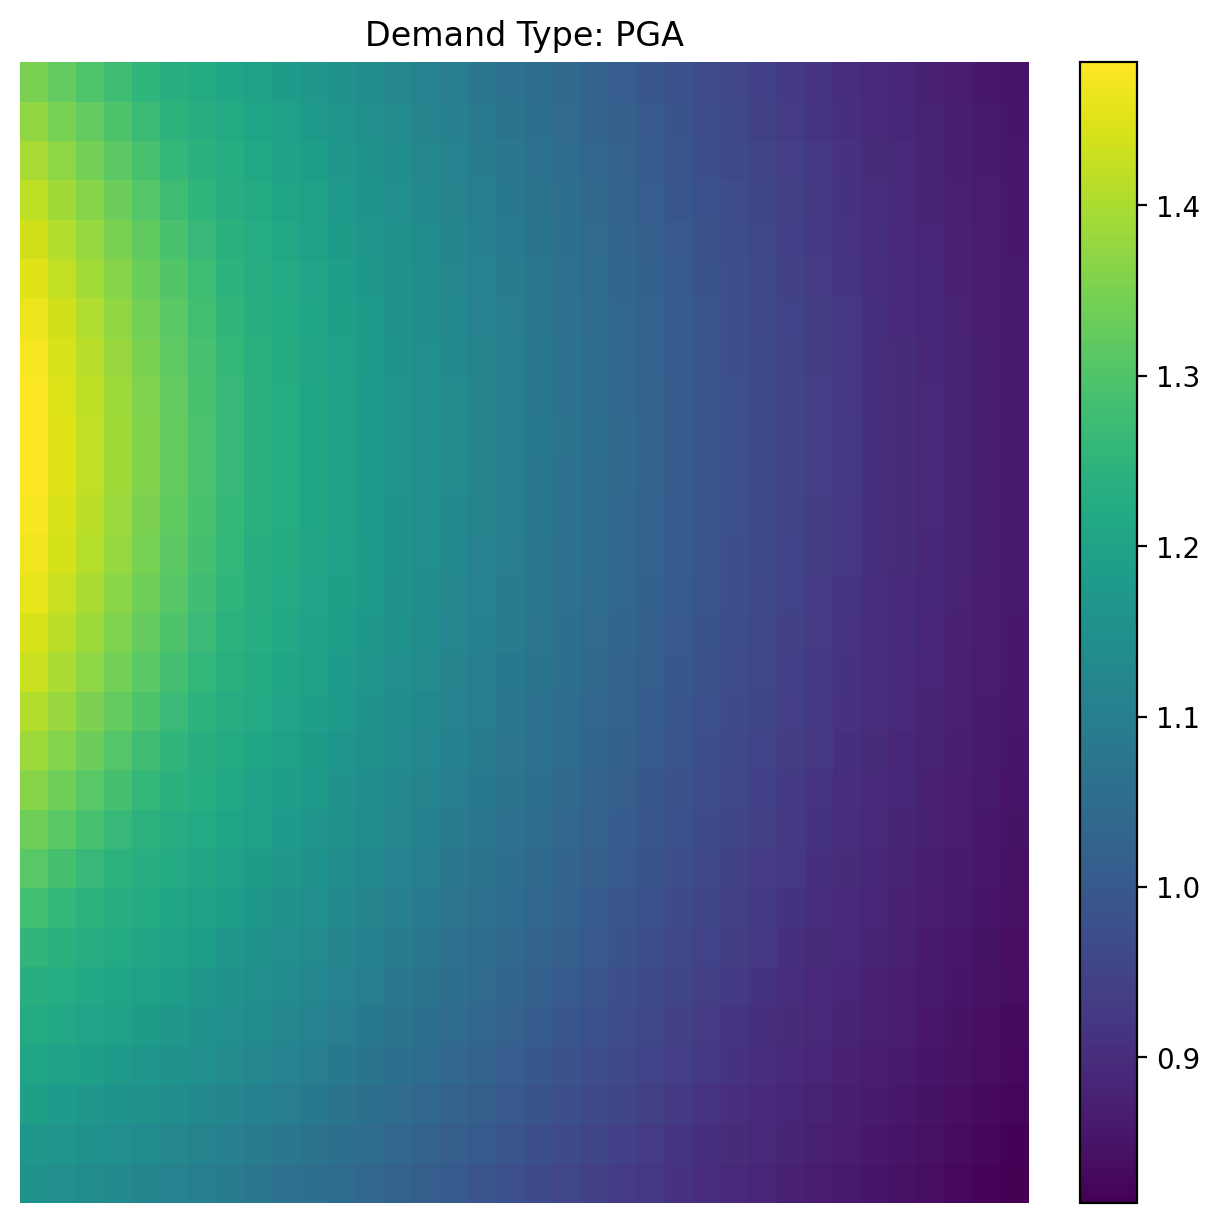

In [341]:
eq_id = "662fdbe14fc4061e326c4d0d"
earthquake_model_metadata = hazardsvc.get_earthquake_hazard_metadata(eq_id)
print(json.dumps(earthquake_model_metadata, indent=4, sort_keys=False))

viz.plot_earthquake(eq_id, client)

# Load the fragility mapping for San Francisco Buildings
W1 and W2 type buildings are only considered for the final project

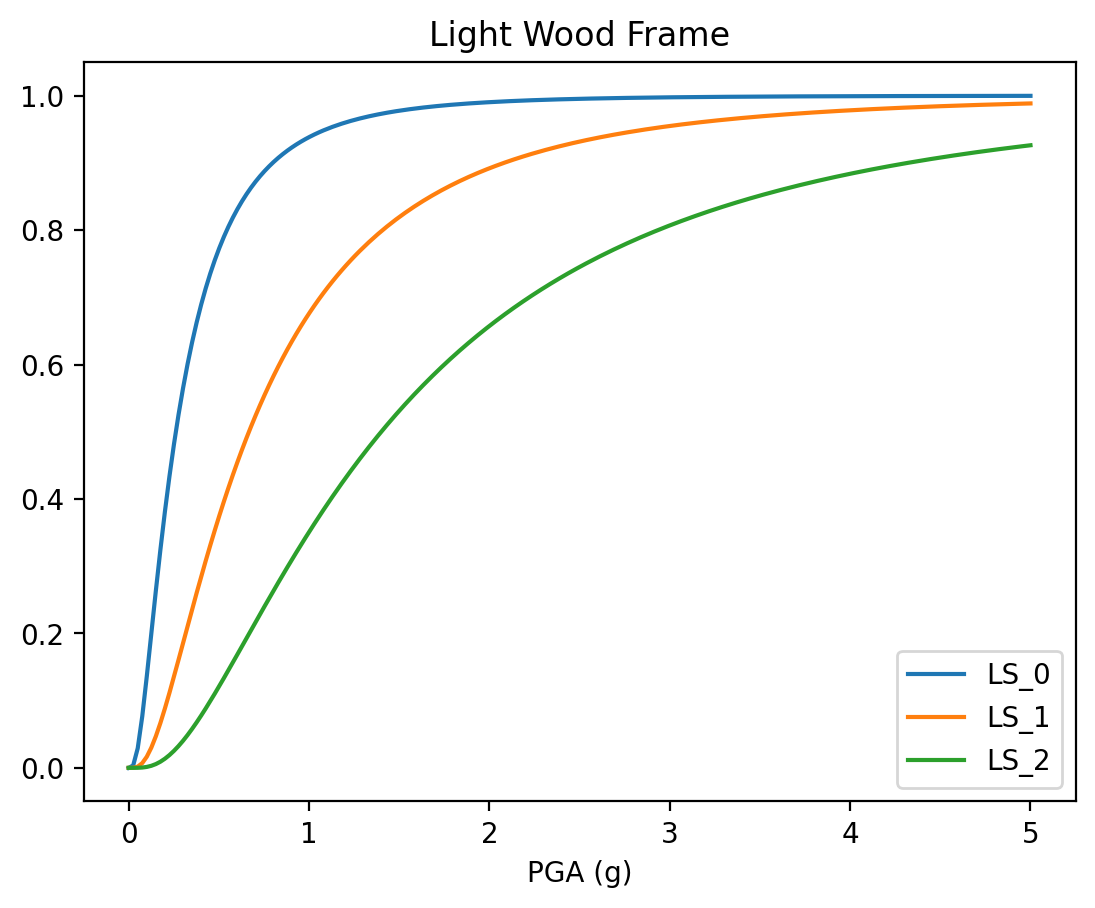

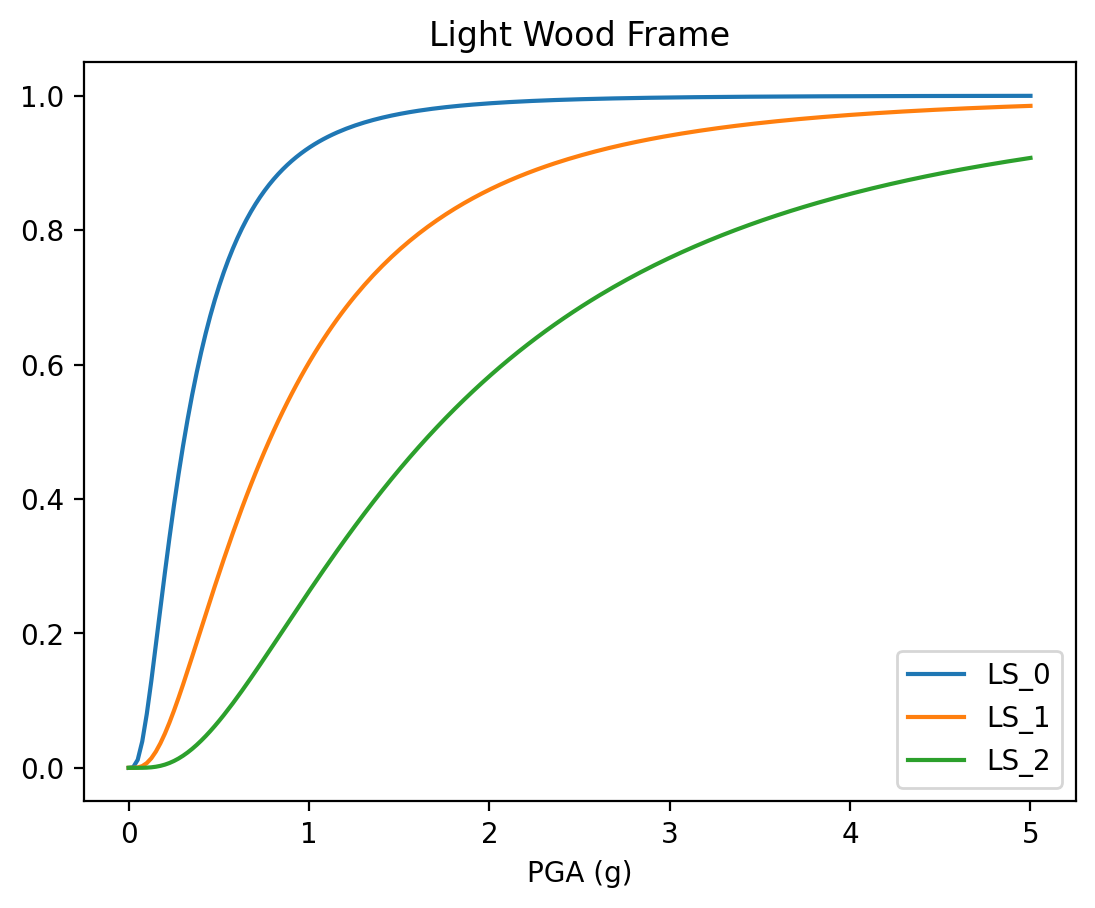

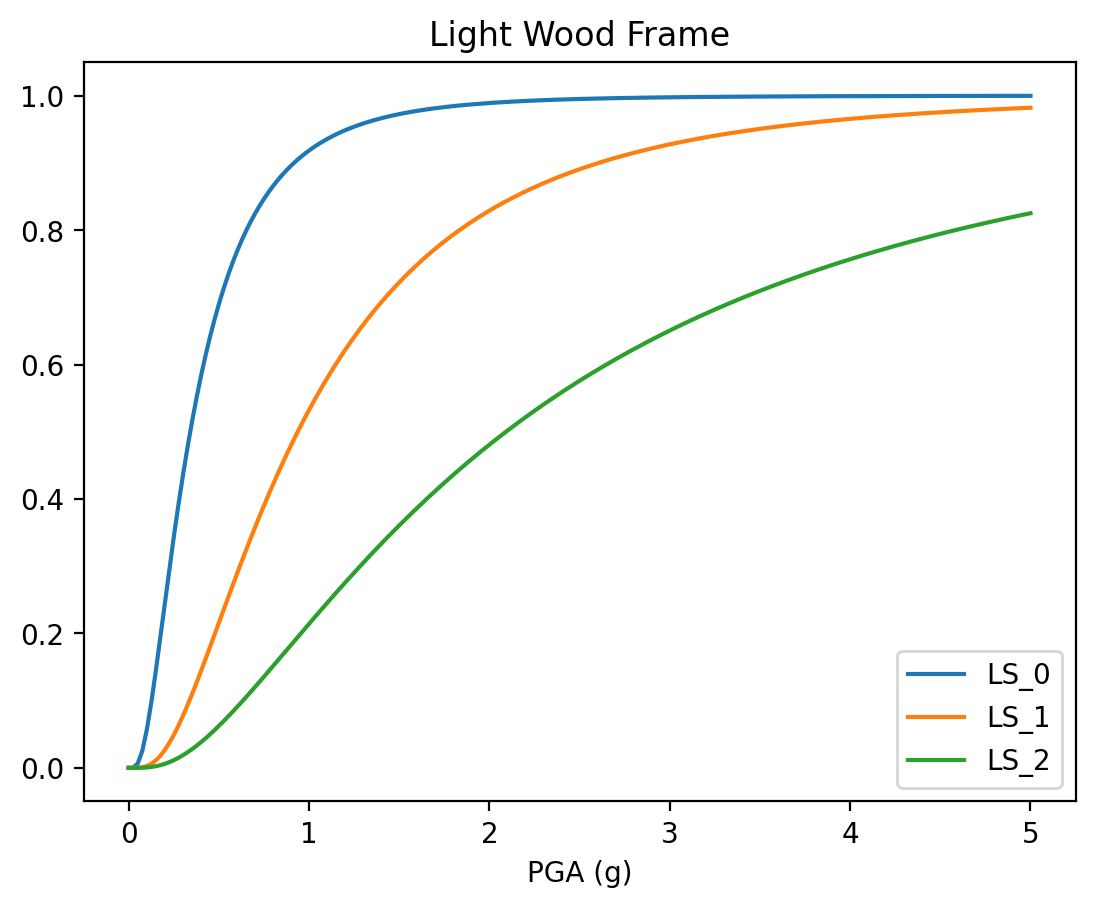

In [342]:
mapping_id = "5b47b2d9337d4a36187c7563"
mapping_set = MappingSet(fragility_services.get_mapping(mapping_id))



# plot fragility for the first 3 archetypes using pyincore viz method


for mapping in mapping_set.mappings[:3]:

    fragility_id = mapping.entry["Non-Retrofit Fragility ID Code"]

    fragility_set = FragilityCurveSet(fragility_services.get_dfr3_set(fragility_id))

    plt = frag_plot.get_fragility_plot(fragility_set, start=0, end=5)

    plt.show()

## Shift fragilities to the right and left by 5%

In [343]:
# import json
# from pyincore.models.fragilitycurveset import FragilityCurveSet

# with open("w_fragility.json", "r") as file:
#     data = json.load(file)
# # Sample data loading (this would be your actual JSON file loaded)
# fragility_data = "w_fragility.json"


# import json
# import requests


# # Function to fetch fragility data from IN-CORE web services
# def fetch_fragility_data(fragility_id):
#     api_url = f"https://incore.ncsa.illinois.edu/api/fragility/{fragility_id}"
#     response = requests.get(api_url)
#     if response.status_code == 200:
#         return response.json()
#     else:
#         return None


# # Function to update the median spectral acceleration
# def update_median_sa(fragility_data, percentage_increase):
#     median_sa = fragility_data["properties"]["medianSA"]
#     updated_median = median_sa * (1 + percentage_increase / 100)
#     fragility_data["properties"]["medianSA"] = updated_median
#     return fragility_data


# # Main process
# def process_fragilities(json_data, percentage_increase):
#     updated_fragilities = []
#     for mapping in json_data["mappings"]:
#         for fragility_id in mapping["entry"].values():
#             fragility_data = fetch_fragility_data(fragility_id)
#             if fragility_data:
#                 updated_fragility = update_median_sa(
#                     fragility_data, percentage_increase
#                 )
#                 updated_fragilities.append(updated_fragility)
#     return updated_fragilities


# # Load JSON data from a file
# with open("fragility_mapping.json", "r") as file:
#     json_data = json.load(file)

# # Specify the percentage increase
# percentage_increase = 5  # Increase median by 5%

# # Process the fragilities
# updated_fragilities = process_fragilities(json_data, percentage_increase)

# # Write updated fragilities to a new file
# with open("updated_fragility_mapping.json", "w") as outfile:
#     json.dump(updated_fragilities, outfile, indent=4)

# Building Damage
Implement the prediction of community level damage to the buildings in Wilson county due to the Nashville-Cookeville tornado damage mapped to the fragilities developed for Joplin as mentioned above.

In [344]:
from pyincore.analyses.buildingdamage import (
    BuildingDamage,
)  # Import building damage module integrated into pyIncore.

In [345]:
building_damage = BuildingDamage(client)

building_inventory = building_damage.set_input_dataset("buildings", building)
building_damage.set_input_dataset("dfr3_mapping_set", mapping_set)

True

In [346]:
# Set up paramters/input for building damage
result_name = "san_francisco"
hazard_type = "earthquake"
hazard_id = "662fdbe14fc4061e326c4d0d"
hazard_name = "earthquake"

building_damage.set_parameter("result_name", result_name)
building_damage.set_parameter("hazard_type", hazard_type)
building_damage.set_parameter("hazard_id", hazard_id)
building_damage.set_parameter(
    "num_cpu", 8
)  # Define the result name, etc., and choose the number of CPU locally
# to run the model parallelly.

True

## Run analysis on the building to get the building damage result

In [348]:
building_damage.run_analysis()
building_damage_result = building_damage.get_output_dataset("ds_result")

# Convert dataset to Pandas DataFrame
df_building_damage = building_damage_result.get_dataframe_from_csv()
# Display top 5 rows of output data
df_building_damage

In [ ]:
df_building_damage.DS_3.describe()

In [ ]:
# you can choose columns to be merged
df_building_damage_merged = building_gdf[
    ["guid", "archetype", "struct_typ", "geometry", "dlevel"]
].merge(df_building_damage, on="guid")
df_building_damage_merged

In [ ]:
df_building_damage_merged["max_damage_state"] = df_building_damage_merged[
    ["DS_0", "DS_1", "DS_2", "DS_3"]
].idxmax(axis=1)

In [ ]:
df_building_damage_merged

# Monte Carlo Failure Probability Curve

In [ ]:
import os

current_path = os.getcwd()

#### create folder "MMSA_analysis_results" to save results
results_folder = "sf_analysis"
if not os.path.isdir(results_folder):
    os.makedirs(results_folder)

#### define folder path for each eathquake magnitude to save results in different folders
fp = current_path + "/" + results_folder + "/" + hazard_name
if not os.path.isdir(fp):
    os.makedirs(fp)
fp = fp + "/"

In [ ]:
from pyincore.analyses.montecarlofailureprobability import MonteCarloFailureProbability

num_samples = (
    100  # Require 500 samples for convergence - Selected smaller samples for testing
)
result_name = fp + "sf_failure_probability_buildings"

mc_bldg = MonteCarloFailureProbability(client)

mc_bldg.set_input_dataset("damage", building_damage_result)
mc_bldg.set_parameter("num_cpu", 8)
mc_bldg.set_parameter("num_samples", num_samples)
mc_bldg.set_parameter("damage_interval_keys", ["DS_0", "DS_1", "DS_2", "DS_3"])
mc_bldg.set_parameter("failure_state_keys", ["DS_1", "DS_2", "DS_3"])

mc_bldg.set_parameter("result_name", result_name)

In [ ]:
mc_bldg.run_analysis()  # Run the Monte Carlo Simulation module to obtain the building failure probabilities. The building failure
# probabilities herein only consider the physical damage without the interdependency.

building_failure_probability = mc_bldg.get_output_dataset(
    "failure_probability"
)  # get buildings failure probabilities

df_bldg_fail = building_failure_probability.get_dataframe_from_csv()
df_bldg_fail.head()

In [ ]:
building_damage_mcs_samples = mc_bldg.get_output_dataset(
    "sample_failure_state"
)  # get buildings failure states

bdmcs = building_damage_mcs_samples.get_dataframe_from_csv()
bdmcs.head()

In [ ]:
# getting geodataframework of building dataset and merge with output
bldg_fail_gdf = building_gdf.merge(df_bldg_fail, on="guid")

In [ ]:
bldg_fail_gdf

In [ ]:
bldg_fail_gdf[bldg_fail_gdf["failure_probability"] >= 0.5]

In [ ]:
viz.plot_gdf_map(bldg_fail_gdf, column="failure_probability")

In [ ]:
df_building_damage_merged["max_damage_state"].value_counts()

# Group buildings by archeytpes

In [ ]:
grouped_building_damage = df_building_damage_merged.groupby(
    by=["struct_typ"], as_index=True
).agg({"DS_0": "mean", "DS_1": "mean", "DS_2": "mean", "DS_3": "mean", "guid": "count"})
grouped_building_damage.rename(columns={"guid": "total_count"}, inplace=True)
grouped_building_damage.head()

# Visualizing buidling damage results

In [ ]:
df_building_damage_merged_exposure = df_building_damage_merged.loc[
    df_building_damage_merged["haz_expose"] == "yes"
]

In [ ]:
df_building_damage_merged_exposure

In [ ]:
df_building_damage_merged_exposure[df_building_damage_merged_exposure["dlevel"] == "MC"]

In [ ]:
# Lets look at how many buildings were exposed to the Hazard
count = df_building_damage_merged_exposure["haz_expose"].value_counts()
plt = count.plot(kind="bar")

In [ ]:
grouped_bldg_dmg_exposure = df_building_damage_merged_exposure.groupby(
    by=["struct_typ"], as_index=True
).agg({"DS_0": "mean", "DS_1": "mean", "DS_2": "mean", "DS_3": "mean", "guid": "count"})
grouped_bldg_dmg_exposure.rename(columns={"guid": "total_count"}, inplace=True)
grouped_bldg_dmg_exposure

In [ ]:
damage_state_buildings = grouped_bldg_dmg_exposure
damage_state_buildings["DS_0_count"] = round(
    damage_state_buildings["DS_0"] * damage_state_buildings["total_count"]
)
damage_state_buildings["DS_1_count"] = round(
    damage_state_buildings["DS_1"] * damage_state_buildings["total_count"]
)
damage_state_buildings["DS_2_count"] = round(
    damage_state_buildings["DS_2"] * damage_state_buildings["total_count"]
)
damage_state_buildings["DS_3_count"] = round(
    damage_state_buildings["DS_3"] * damage_state_buildings["total_count"]
)

# damage_state_buildings.loc["Total"] = [
#     sum(damage_state_buildings["DS_0"]),
#     sum(damage_state_buildings["DS_1"]),
#     sum(damage_state_buildings["DS_2"]),
#     sum(damage_state_buildings["DS_3"]),
#     sum(damage_state_buildings["total_count"]),
#     sum(damage_state_buildings["DS_0_count"]),
#     sum(damage_state_buildings["DS_1_count"]),
#     sum(damage_state_buildings["DS_2_count"]),
#     sum(damage_state_buildings["DS_3_count"]),
# ]

damage_state_buildings

In [ ]:
# Plot Damage state by archetype
ax = grouped_bldg_dmg_exposure[["DS_0", "DS_1", "DS_2", "DS_3"]].plot.barh(stacked=True)
ax.set_title("Stacked Bar Chart of Damage State Grouped by Archetype Type", fontsize=12)
ax.set_xlabel("complete damage value", fontsize=12)
ax.legend(loc="center right")

# Visualize the damage states

In [ ]:
from pyincore_viz.geoutil import GeoUtil as geoviz

In [ ]:
# Plot a map with GeoDataframe
geoviz.plot_gdf_map(df_building_damage_merged, "DS_3", basemap=True)

In [ ]:
filtered_df = df_building_damage_merged[
    (df_building_damage_merged["struct_typ"] == "W2")
    & (df_building_damage_merged["dlevel"] == "PC")
]
filtered_df.value_counts()

# Only residential buildings

In [ ]:
residential_archetypes = ["W1"]
mask = df_building_damage_merged["struct_typ"].isin(residential_archetypes)
df_residential_bldg_dmg = df_building_damage_merged.loc[mask]
geoviz.plot_gdf_map(df_residential_bldg_dmg, "DS_3", basemap=True)

In [ ]:
df_residential_bldg_dmg

In [ ]:
residential_archetypes = ["W2"]
dlevel_type = ["MC"]
mask = df_building_damage_merged["struct_typ"].isin(
    residential_archetypes
) & df_building_damage_merged["dlevel"].isin(dlevel_type)
df_residential_bldg_dmg = df_building_damage_merged.loc[mask]
geoviz.plot_gdf_map(df_residential_bldg_dmg, "DS_2", basemap=True)

In [ ]:
df_building_damage["DS_3"]